In [1]:
# complete case analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# missing completely at random
%matplotlib inline

excel_file_path = "./data_science_job.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [2]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [3]:
df.gender.isnull().sum()

4508

In [4]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
# separating columns with less than 5% of missing values
cols_with_missing_less_than_5_per = [
    var
    for var in df.columns
    if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0
]
print(cols_with_missing_less_than_5_per)

['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']


In [6]:
df[cols_with_missing_less_than_5_per].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8089,0.920,no_enrollment,Primary School,4.0,6.0
3679,0.887,no_enrollment,Graduate,14.0,64.0
13226,0.624,Full time course,Graduate,5.0,9.0
15925,0.920,no_enrollment,Masters,15.0,18.0
3619,0.624,Full time course,Masters,13.0,166.0


In [7]:
print(len(df[cols_with_missing_less_than_5_per]), len(df))
# dropping NA values from columns with less than 5% of missing values
new_df = df[cols_with_missing_less_than_5_per].dropna()
# ration of no. of rows bw after dropping and before dropping
print(len(new_df) / len(df))
# shape: rows X columns after dropping and before dropping
print(new_df.shape, df.shape)

19158 19158
0.8968577095730244
(17182, 5) (19158, 13)


In [10]:
new_df["city_development_index"].value_counts().head(5)

city_development_index
0.920    4772
0.624    2367
0.910    1398
0.926    1189
0.698     568
Name: count, dtype: int64

ratio of city_development_index before dropping na
 city_development_index
0.920    0.265059
0.624    0.136705
0.910    0.078401
0.926    0.067700
0.698    0.034659
           ...   
0.649    0.000209
0.807    0.000209
0.781    0.000157
0.625    0.000157
0.664    0.000052
Name: count, Length: 93, dtype: float64
ratio of city_development_index after dropping na
 city_development_index
0.920    0.277733
0.624    0.137760
0.910    0.081364
0.926    0.069200
0.698    0.033058
           ...   
0.693    0.000175
0.649    0.000175
0.781    0.000175
0.625    0.000116
0.664    0.000058
Name: count, Length: 93, dtype: float64


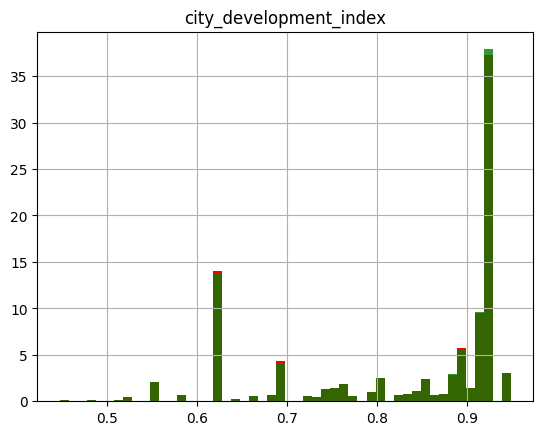

ratio of enrolled_university before dropping na
 enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64
ratio of enrolled_university after dropping na
 enrolled_university
no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: count, dtype: float64


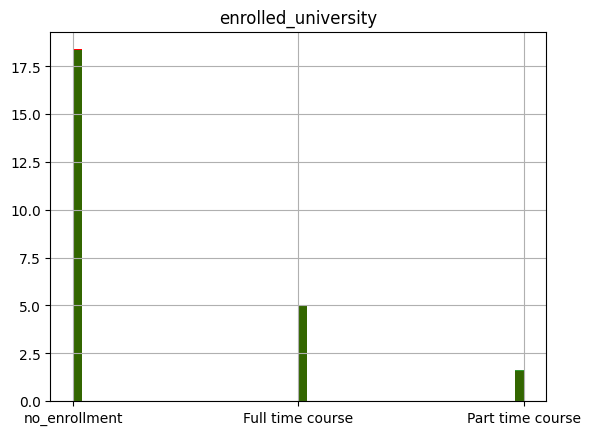

ratio of education_level before dropping na
 education_level
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: count, dtype: float64
ratio of education_level after dropping na
 education_level
Graduate          0.619835
Masters           0.234082
High School       0.107380
Phd               0.022116
Primary School    0.016587
Name: count, dtype: float64


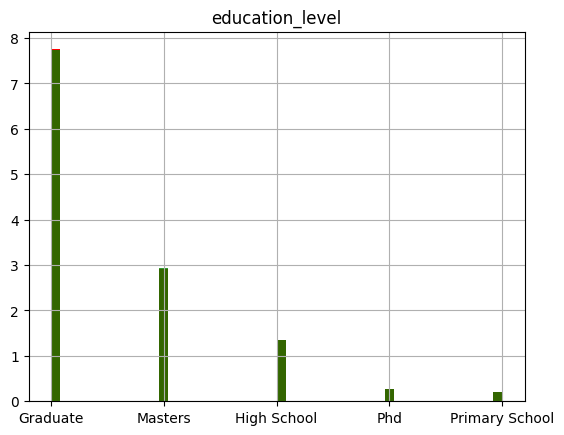

ratio of experience before dropping na
 experience
20.0    0.179246
5.0     0.074642
4.0     0.073233
3.0     0.070675
6.0     0.063472
2.0     0.058827
7.0     0.053659
10.0    0.051415
9.0     0.051154
8.0     0.041862
15.0    0.035807
11.0    0.034659
14.0    0.030588
1.0     0.028656
0.0     0.027247
16.0    0.026516
12.0    0.025786
13.0    0.020827
17.0    0.017852
19.0    0.015868
18.0    0.014615
Name: count, dtype: float64
ratio of experience after dropping na
 experience
20.0    0.183331
5.0     0.074613
4.0     0.073042
3.0     0.068793
6.0     0.063555
2.0     0.057036
7.0     0.053952
10.0    0.051740
9.0     0.051158
8.0     0.041963
15.0    0.036492
11.0    0.036084
14.0    0.030555
1.0     0.027703
16.0    0.027121
12.0    0.026539
0.0     0.025434
13.0    0.021418
17.0    0.018100
19.0    0.016180
18.0    0.015190
Name: count, dtype: float64


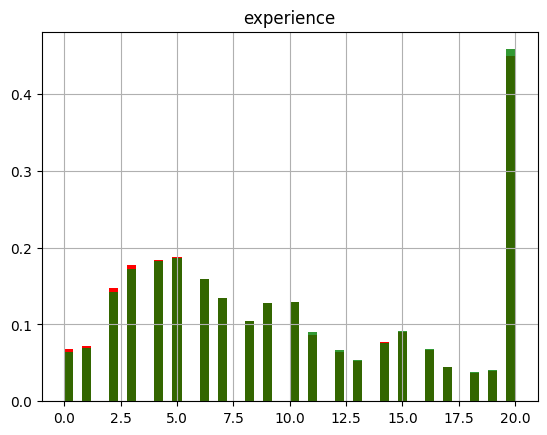

ratio of training_hours before dropping na
 training_hours
28.0     0.016703
18.0     0.014563
12.0     0.014563
22.0     0.014250
50.0     0.014041
           ...   
272.0    0.000261
240.0    0.000261
234.0    0.000261
238.0    0.000209
286.0    0.000209
Name: count, Length: 241, dtype: float64
ratio of training_hours after dropping na
 training_hours
28.0     0.017809
18.0     0.015074
22.0     0.015074
12.0     0.014958
50.0     0.014841
           ...   
238.0    0.000233
234.0    0.000233
272.0    0.000233
228.0    0.000233
286.0    0.000233
Name: count, Length: 241, dtype: float64


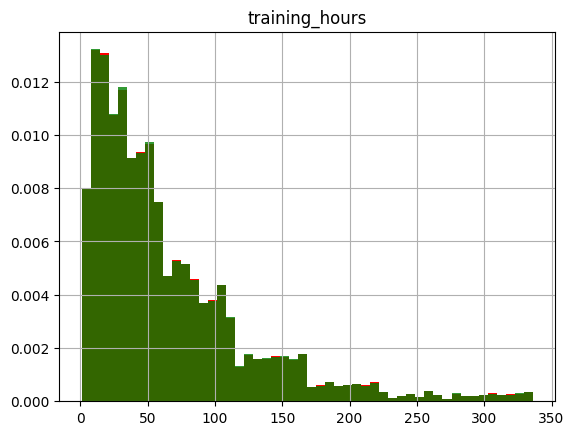

In [11]:
# checking density & ratio differences in histogram of new and previous df to see the impact of dropping Na
for col in cols_with_missing_less_than_5_per:
    print(f"ratio of {col} before dropping na\n", df[col].value_counts() / len(df))
    print(
        f"ratio of {col} after dropping na\n", new_df[col].value_counts() / len(new_df)
    )
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[col].hist(bins=50, ax=ax, density=True, color="red")
    new_df[col].hist(bins=50, ax=ax, density=True, color="green", alpha=0.8)
    plt.title(col)
    plt.show()